1316.84096117


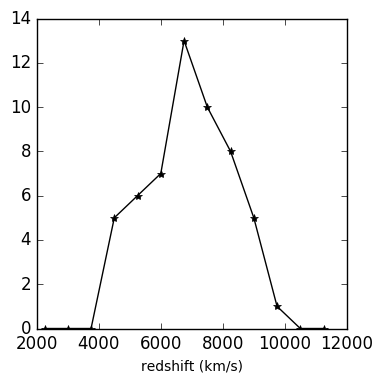

In [3]:
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 


def loadData(filename):
    '''
    Read fits data
    
    '''
    tchfits = fits.open(filename)
    tabl = tchfits[1].data
    return tabl

## the mean redshift of Coma cluster
filename = 'ComaCluster.fits'
coma = loadData(filename)
cz = coma.czA[(coma.czA<20000) & (coma.czA>0)]
sig_cz = np.var(cz)
print np.sqrt(sig_cz)
zgrid =np.arange(2000.,12000.,750.)
h, xedge = np.histogram(cz, bins=zgrid)
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(zgrid[0:-1]+250.,h,'k*-')
ax.set_xlabel('redshift (km/s)')
fig.show()

In [4]:
#known sigma ask for mean redshift
import scipy.stats as stats
import scipy.special as special

n = len(cz)
sig = 1317.0
tao_0 = 1000.0
mu_0 = 6925.0
mu_1 = (1./tao_0**2*mu_0+n/sig**2*np.mean(cz))/\
    (1./tao_0**2+n/sig**2)
tao_1 = 1./(1./tao_0**2+n/sig**2)
print n, np.mean(cz), mu_1, np.sqrt(tao_1)
print 1./tao_0**2,n/sig**2

55 7004.74545455 7002.30747341 174.848616859
1e-06 3.17096274465e-05


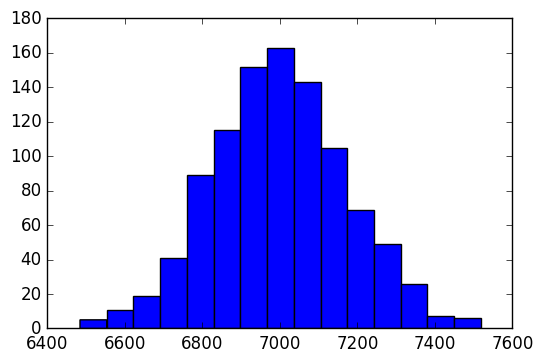

In [5]:
#p(theta|sigma,y)
sig2 = sig**2
N = 1000
mu = np.random.normal(mu_1, np.sqrt(tao_1),size=N)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(mu,15)
fig.show()